# Lab 2: Titanic Data Set
#### Name: Mindy Cruz
#### Date: 3/23/2025

Introduction: Using the Titanic dataset and perform a simlar analysis



Section 1: Import and Inspect Data


In [3]:

#Imports
import seaborn as sns
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

In [4]:
# Load the dataset from Seaborn
titanic = sns.load_dataset('titanic')

In [5]:
# Display the column names, null counts and datatypes
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [6]:
# Display the first 10 rows
print(titanic.head(10))

   survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0         0       3    male  22.0      1      0   7.2500        S   Third   
1         1       1  female  38.0      1      0  71.2833        C   First   
2         1       3  female  26.0      0      0   7.9250        S   Third   
3         1       1  female  35.0      1      0  53.1000        S   First   
4         0       3    male  35.0      0      0   8.0500        S   Third   
5         0       3    male   NaN      0      0   8.4583        Q   Third   
6         0       1    male  54.0      0      0  51.8625        S   First   
7         0       3    male   2.0      3      1  21.0750        S   Third   
8         1       3  female  27.0      0      2  11.1333        S   Third   
9         1       2  female  14.0      1      0  30.0708        C  Second   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes

In [7]:
# Check for missing values
titanic.isnull().sum()


survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [8]:
titanic.isnull().sum()


survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [9]:
print(titanic.describe())

         survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200


In [10]:
print(titanic.corr(numeric_only=True))

            survived    pclass       age     sibsp     parch      fare  \
survived    1.000000 -0.338481 -0.077221 -0.035322  0.081629  0.257307   
pclass     -0.338481  1.000000 -0.369226  0.083081  0.018443 -0.549500   
age        -0.077221 -0.369226  1.000000 -0.308247 -0.189119  0.096067   
sibsp      -0.035322  0.083081 -0.308247  1.000000  0.414838  0.159651   
parch       0.081629  0.018443 -0.189119  0.414838  1.000000  0.216225   
fare        0.257307 -0.549500  0.096067  0.159651  0.216225  1.000000   
adult_male -0.557080  0.094035  0.280328 -0.253586 -0.349943 -0.182024   
alone      -0.203367  0.135207  0.198270 -0.584471 -0.583398 -0.271832   

            adult_male     alone  
survived     -0.557080 -0.203367  
pclass        0.094035  0.135207  
age           0.280328  0.198270  
sibsp        -0.253586 -0.584471  
parch        -0.349943 -0.583398  
fare         -0.182024 -0.271832  
adult_male    1.000000  0.404744  
alone         0.404744  1.000000  


Reflection 1:
1) How many data instances are there? 891
2) How many features are there? 15
3) What are the names? survived, pclass, sex. age sibsp, parch, fare, embarked, class, who, adult_male, deck, embark_town, alive, alone
4) Are there any missing values? Yes. These are the features with missing values: Agae, embarked, deck, and embark_town
5) Are there any non-numeric features? Yes

6) Are the data instances sorted on any of the attributes? no
7) What are the units of age? Years
8) What are the minimum, median and max age? Min: 0.42 years, Med: 28 years and Max: 80 years
9) What two different features have the highest correlation? Sibsp and Alone

10) Are there any categorical features that might be useful for prediction? Knowing what we know about this tragedy I would predict some of the more useful feature would be age, class, sex, deck, and pclass

# Section 2. Data Exploration and Patterns

array([[<Axes: xlabel='age', ylabel='age'>,
        <Axes: xlabel='fare', ylabel='age'>,
        <Axes: xlabel='pclass', ylabel='age'>],
       [<Axes: xlabel='age', ylabel='fare'>,
        <Axes: xlabel='fare', ylabel='fare'>,
        <Axes: xlabel='pclass', ylabel='fare'>],
       [<Axes: xlabel='age', ylabel='pclass'>,
        <Axes: xlabel='fare', ylabel='pclass'>,
        <Axes: xlabel='pclass', ylabel='pclass'>]], dtype=object)

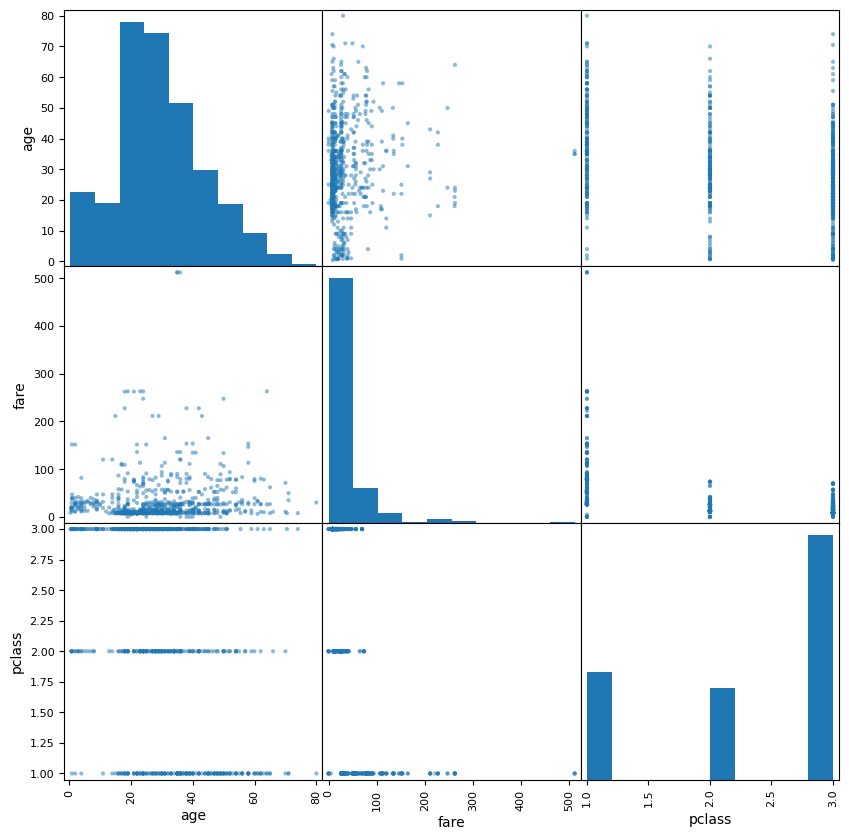

In [11]:
#scatter matrix
attributes = ['age', 'fare', 'pclass']
scatter_matrix(titanic[attributes], figsize=(10, 10))

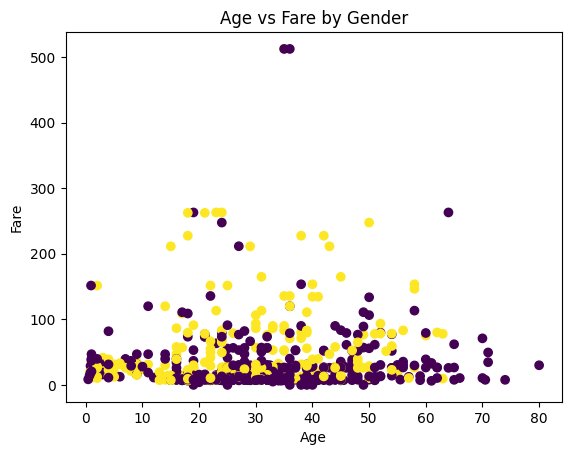

In [12]:
#scatter plot
plt.scatter(titanic['age'], titanic['fare'], c=titanic['sex'].apply(lambda x: 0 if x == 'male' else 1))
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Age vs Fare by Gender')
plt.show()

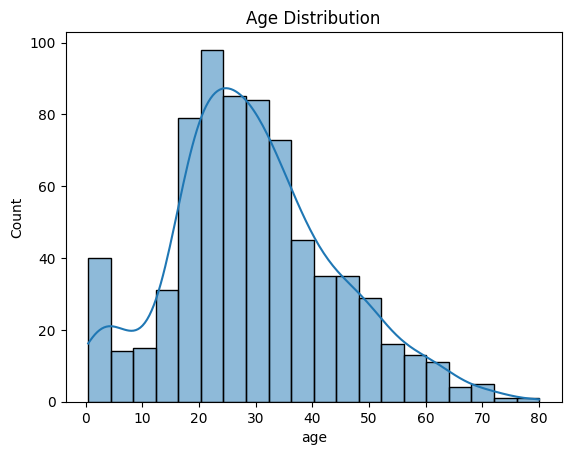

In [13]:
#histogram
sns.histplot(titanic['age'], kde=True)
plt.title('Age Distribution')
plt.show()

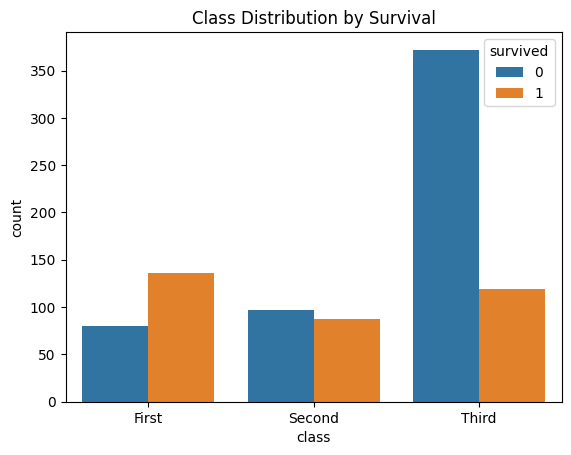

In [14]:
# class vs survival
sns.countplot(x='class', hue='survived', data=titanic)
plt.title('Class Distribution by Survival')
plt.show()

Reflection 2.1:
What patterns or anomalies do you notice? There are outliers in age/fare
Do any features stand out as potential predictors? Class, there were far more 3rd class passengers vs first and second
Are there any visible class imbalances? Yes, based on the data 3rd class passengers had a lower chance of survival. I think this tracks historically

2.2 Handle Missing Values and Clean Data

In [ ]:
# Age Missing
titanic['age'].fillna(titanic['age'].median(), inplace=True)

#Embark_town Missing
titanic['embark_town'].fillna(titanic['embark_town'].mode()[0], inplace=True)

2.3 Feature Engineering

In [16]:
#family size
titanic['family_size'] = titanic['sibsp'] + titanic['parch'] + 1

In [17]:
#data to numeric
titanic['sex'] = titanic['sex'].map({'male': 0, 'female': 1})
titanic['embarked'] = titanic['embarked'].map({'C': 0, 'Q': 1, 'S': 2})

In [18]:
#alone
titanic['alone'] = titanic['alone'].astype(int)

Reflection 2.3: 
Why might family size be a useful feature for predicting survival? If families chose to remain together vs seperating, I think they would have a low rate of survival based on knowing wome and children were encorage to get on the boats first. 
Why convert categorical data to numeric? Math operations require numbers in most case in regard to machine learning.

# Section 3 Feature Selection and Justification

In [19]:
# x & y

X = titanic[['age', 'fare', 'pclass', 'sex', 'family_size']]
y = titanic['survived']

Reflection 3: 
Why are these features selected? Changes of survival can be determined by these features. fare and pclass alone can give us a good indication of the passangers survival rates
Are there any features that are likely to be highly predictive of survival? one not in our list is adult_male, we know that women and children were ushered off in boats and men were left behind. Fare and Class as I stated above will yeild stable results as well in relation to survival. 



# Section 4 Splitting

In [20]:
#Basic Train/Test Split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=123)

print('Train size (X):', len(X_train))
print('Test size (X):', len(X_test))
print('Train size (y):', len(y_train))
print('Test size (y):', len(y_test))

Train size (X): 712
Test size (X): 179
Train size (y): 712
Test size (y): 179


In [21]:
#Stratified Train/Test split

splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123)

for train_indices, test_indices in splitter.split(X, y):
    train_set = X.iloc[train_indices]
    test_set = X.iloc[test_indices]

print('Train size:', len(train_set))
print('Test size:', len(test_set))

Train size: 712
Test size: 179


In [22]:
#compare

print("Original Class Distribution:\n", titanic['pclass'].value_counts(normalize=True))
print("Train Set Class Distribution:\n", train_set['pclass'].value_counts(normalize=True))
print("Test Set Class Distribution:\n", test_set['pclass'].value_counts(normalize=True))

Original Class Distribution:
 pclass
3    0.551066
1    0.242424
2    0.206510
Name: proportion, dtype: float64
Train Set Class Distribution:
 pclass
3    0.561798
1    0.227528
2    0.210674
Name: proportion, dtype: float64
Test Set Class Distribution:
 pclass
3    0.508380
1    0.301676
2    0.189944
Name: proportion, dtype: float64


Reflection 4:

Why might stratification improve model performance? it ensures that the model is equally representative in the data splits
How close are the training and test distributions to the original dataset? Training and test distributes match up very closly to the orginal dataset
Which split method produced better class balance? stratified

 